In [12]:
import os
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
os.chdir(os.path.dirname(os.getcwd()))

In [6]:
data = pd.read_csv("data/episodes.csv")

In [7]:
data["accuracy_smooth"] = data["accuracy"].rolling(window=120).mean()
data["reward_smooth"] = data["episode_reward"].rolling(window=120).mean()

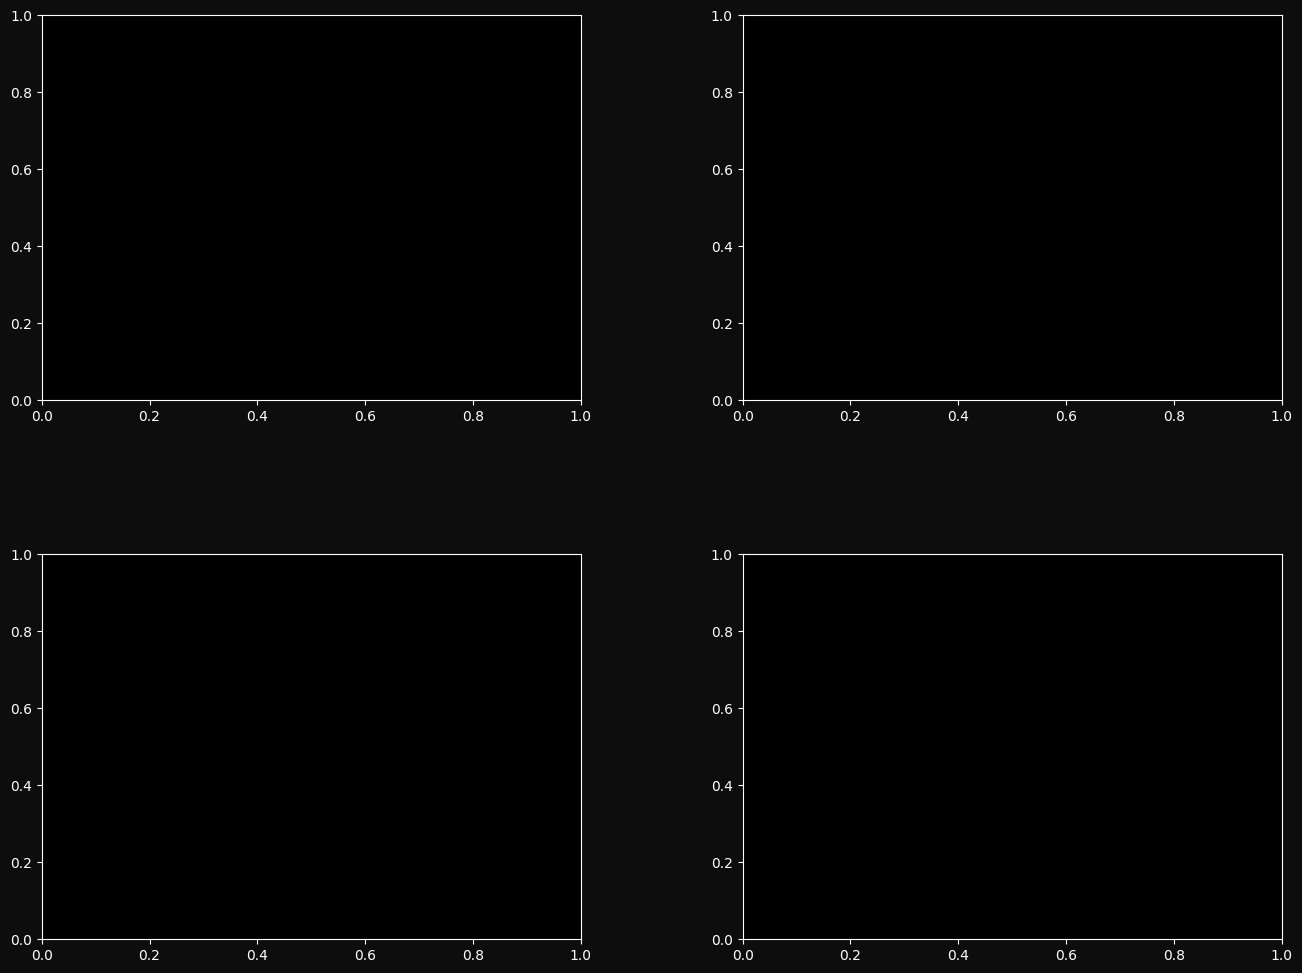

In [29]:
plt.style.use("dark_background")

# Smooth columns if needed
data['accuracy_smooth'] = data['accuracy'].rolling(window=5).mean()
data['reward_smooth'] = data['episode_reward'].rolling(window=5).mean()

# Define style parameters
bg_color = "#0d0d0d"
line_color = "#f5f5f5"
hcol = "#00d4ff"       # Cyan
acol = "#ffac33"       # Orange
keypassCol = "#ffd700" # Gold

# Curriculum milestones
milestones = [0, 100000, 200000, 300000, 400000]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor=bg_color)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def stylize_ax(ax):
    ax.set_facecolor(bg_color)
    ax.tick_params(colors=line_color)
    ax.spines['bottom'].set_color(line_color)
    ax.spines['left'].set_color(line_color)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    for milestone in milestones:
        ax.axvline(x=milestone, linestyle='--', color="#888888", linewidth=1)


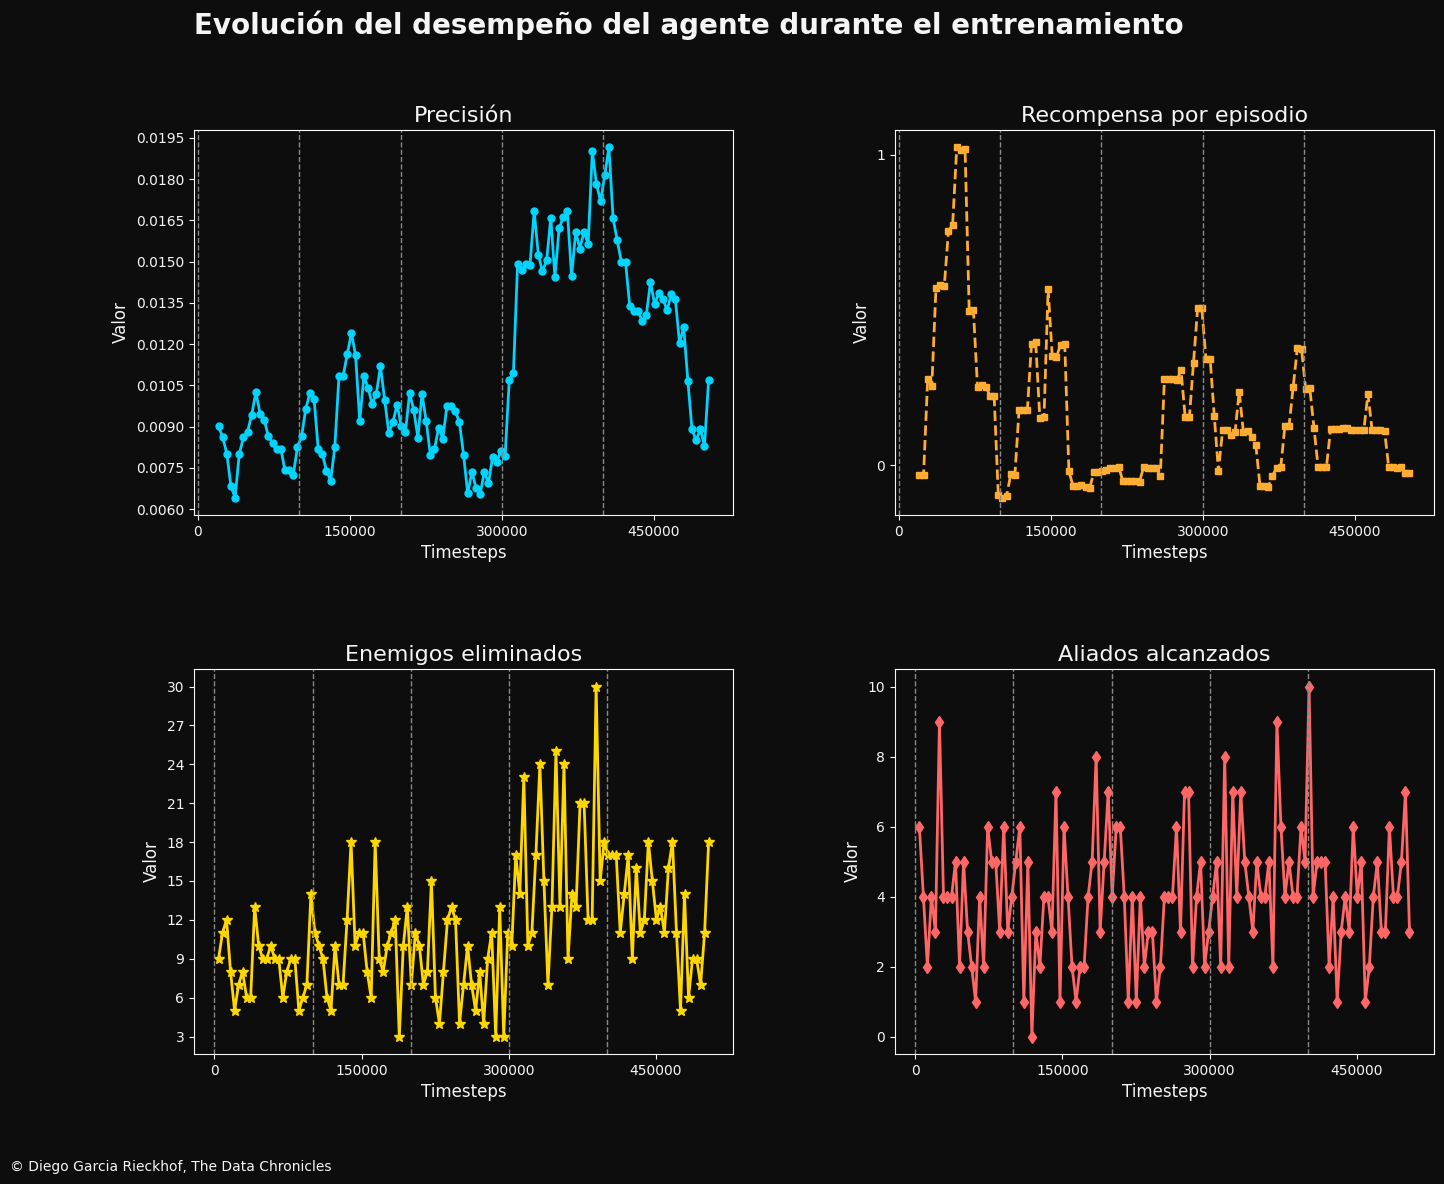

In [30]:
# Recreate the final plot with the corrected reward column
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor=bg_color)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Apply style and plot to each subplot
# Graph 1: Accuracy
axs[0, 0].plot(data['timesteps'], data['accuracy_smooth'], 'o-', color=hcol, markersize=5, linewidth=2)
axs[0, 0].set_title("Precisión", fontsize=16, color=line_color)
stylize_ax(axs[0, 0])

# Graph 2: Recompensa por episodio
axs[0, 1].plot(data['timesteps'], data['reward_smooth'], 's--', color=acol, markersize=5, linewidth=2)
axs[0, 1].set_title("Recompensa por episodio", fontsize=16, color=line_color)
stylize_ax(axs[0, 1])

# Graph 3: Enemigos eliminados
axs[1, 0].plot(data['timesteps'], data['enemies_killed'], '*-', color=keypassCol, markersize=7, linewidth=2)
axs[1, 0].set_title("Enemigos eliminados", fontsize=16, color=line_color)
stylize_ax(axs[1, 0])

# Graph 4: Aliados alcanzados
axs[1, 1].plot(data['timesteps'], data['allies_hit'], 'd-', color="#ff6666", linewidth=2)
axs[1, 1].set_title("Aliados alcanzados", fontsize=16, color=line_color)
stylize_ax(axs[1, 1])

# Common axis labels
for ax in axs.flat:
    ax.set_xlabel("Timesteps", fontsize=12, color=line_color)
    ax.set_ylabel("Valor", fontsize=12, color=line_color)

# Main title and footer
fig.suptitle("Evolución del desempeño del agente durante el entrenamiento", 
             fontsize=20, fontweight='bold', color=line_color, ha='left', x=0.125)
fig.text(0.01, 0.01, "© Diego Garcia Rieckhof, The Data Chronicles", fontsize=10, color=line_color, ha='left', va='bottom')

plt.show()